In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [97]:
data = pd.read_csv('data/spirals.csv')

In [98]:
data.head()

,x,y,xy,sinx,siny,x2,y2,label
0,0.500000,0.500000,0.250000,0.938000,0.938000,0.250000,0.250000,0.0
1,0.509999,0.500150,0.255076,0.979264,0.938778,0.260099,0.250150,0.0
2,0.519991,0.500600,0.260307,0.998536,0.941081,0.270391,0.250600,0.0
3,0.529970,0.501350,0.265700,0.995437,0.944824,0.280868,0.251351,0.0
4,0.539928,0.502399,0.271259,0.970152,0.949862,0.291522,0.252404,0.0


In [99]:
X = data.drop('label', axis=1).to_numpy()
y = data['label'].to_numpy()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [162]:
tf.random.set_seed(42)
np.random.seed(42)

model = Sequential()
model.add(Dense(7, activation='sigmoid'))
model.add(Dense(7, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
800/800 [==============================] - 0s 183us/step - loss: 0.7276 - acc: 0.4950
Epoch 2/100
800/800 [==============================] - 0s 102us/step - loss: 0.7074 - acc: 0.4950
Epoch 3/100
800/800 [==============================] - 0s 104us/step - loss: 0.6981 - acc: 0.5125
Epoch 4/100
800/800 [==============================] - 0s 107us/step - loss: 0.6938 - acc: 0.4900
Epoch 5/100
800/800 [==============================] - 0s 106us/step - loss: 0.6912 - acc: 0.5000
Epoch 6/100
800/800 [==============================] - 0s 103us/step - loss: 0.6894 - acc: 0.5375
Epoch 7/100
800/800 [==============================] - 0s 128us/step - loss: 0.6879 - acc: 0.5925
Epoch 8/100
800/800 [==============================] - 0s 113us/step - loss: 0.6869 - acc: 0.5987
Epoch 9/100
800/800 [==============================] - 0s 124us/step - loss: 0.6855 - acc: 0.5913
Epoch 10/100
800/800 [==============================] - 0s 94us/step - loss: 0.6842 - acc: 0.6037
Epoch 11/100
800/800

In [163]:
pred = model.predict(X_test)
accuracy_score(y_test, pred.round())

0.995

In [168]:
xx = np.linspace(4, -4, 100)
yy = np.linspace(-4, 4, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel(), xx.ravel() * yy.ravel(), np.sin(xx.ravel()), 
              np.sin(yy.ravel()), xx.ravel() ** 2, yy.ravel() ** 2]

In [169]:
y_pred = model.predict(Xfull)

In [170]:
len(y_pred)
im = y_pred.reshape(100, 100)

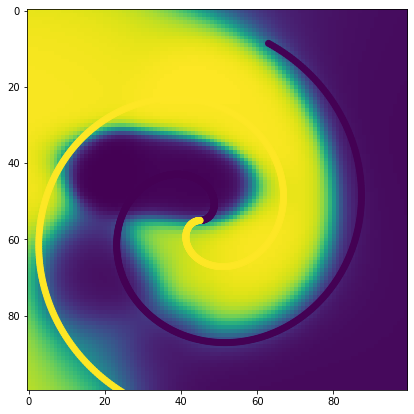

In [212]:
plt.figure(figsize=(7, 7))
plt.scatter((data['x']+4)*10, 100-(data['y']+4)*10, c=data['label'], cmap='viridis')
plt.imshow(-im)